# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

In [1]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# magic word for producing visualizations in notebook
%matplotlib inline

'''
Import note: The classroom currently uses sklearn version 0.19.
If you need to use an imputer, it is available in sklearn.preprocessing.Imputer,
instead of sklearn.impute as in newer versions of sklearn.
'''

'\nImport note: The classroom currently uses sklearn version 0.19.\nIf you need to use an imputer, it is available in sklearn.preprocessing.Imputer,\ninstead of sklearn.impute as in newer versions of sklearn.\n'

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [2]:
# Load in the general demographics data.
azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv', sep=';')

# Load in the feature summary file.
feat_info =  pd.read_csv('AZDIAS_Feature_Summary.csv', sep=';')

In [3]:
print(azdias.shape)
azdias.head()

(891221, 85)


,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


In [4]:
azdias.describe()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
count,891221.000000,891221.000000,891221.000000,886367.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,...,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,794005.000000,794005.000000,794005.00000
mean,-0.358435,2.777398,1.522098,3.632838,3.074528,2.821039,3.401106,3.033328,2.874167,3.075121,...,2.253330,2.801858,1.595426,0.699166,1.943913,3.612821,3.381087,3.167854,5.293002,3.07222
std,1.198724,1.068775,0.499512,1.595021,1.321055,1.464749,1.322134,1.529603,1.486731,1.353248,...,0.972008,0.920309,0.986736,0.727137,1.459654,0.973967,1.111598,1.002376,2.303739,1.36298
min,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.00000
25%,-1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,3.000000,2.000000,2.000000,2.000000,...,1.000000,2.000000,1.000000,0.000000,1.000000,3.000000,3.000000,3.000000,4.000000,2.00000
50%,-1.000000,3.000000,2.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,2.000000,3.000000,2.000000,1.000000,1.000000,4.000000,3.000000,3.000000,5.000000,3.00000
75%,-1.000000,4.000000,2.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,2.000000,1.000000,3.000000,4.000000,4.000000,4.000000,7.000000,4.00000
max,3.000000,9.000000,2.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,4.000000,4.000000,3.000000,2.000000,5.000000,5.000000,5.000000,9.000000,9.000000,9.00000


In [5]:
number_of_nan_beofre_per_collumn=azdias.isnull().sum()
print(number_of_nan_beofre_per_collumn)

AGER_TYP                      0
ALTERSKATEGORIE_GROB          0
ANREDE_KZ                     0
CJT_GESAMTTYP              4854
FINANZ_MINIMALIST             0
FINANZ_SPARER                 0
FINANZ_VORSORGER              0
FINANZ_ANLEGER                0
FINANZ_UNAUFFAELLIGER         0
FINANZ_HAUSBAUER              0
FINANZTYP                     0
GEBURTSJAHR                   0
GFK_URLAUBERTYP            4854
GREEN_AVANTGARDE              0
HEALTH_TYP                    0
LP_LEBENSPHASE_FEIN        4854
LP_LEBENSPHASE_GROB        4854
LP_FAMILIE_FEIN            4854
LP_FAMILIE_GROB            4854
LP_STATUS_FEIN             4854
LP_STATUS_GROB             4854
NATIONALITAET_KZ              0
PRAEGENDE_JUGENDJAHRE         0
RETOURTYP_BK_S             4854
SEMIO_SOZ                     0
SEMIO_FAM                     0
SEMIO_REL                     0
SEMIO_MAT                     0
SEMIO_VERT                    0
SEMIO_LUST                    0
                          ...  
OST_WEST

In [6]:
number_of_nan_before=azdias.isnull().sum().sum()
print(number_of_nan_before)

4896838


In [7]:
azdias.shape

(891221, 85)

In [8]:
azdias.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 85 columns):
AGER_TYP                 891221 non-null int64
ALTERSKATEGORIE_GROB     891221 non-null int64
ANREDE_KZ                891221 non-null int64
CJT_GESAMTTYP            886367 non-null float64
FINANZ_MINIMALIST        891221 non-null int64
FINANZ_SPARER            891221 non-null int64
FINANZ_VORSORGER         891221 non-null int64
FINANZ_ANLEGER           891221 non-null int64
FINANZ_UNAUFFAELLIGER    891221 non-null int64
FINANZ_HAUSBAUER         891221 non-null int64
FINANZTYP                891221 non-null int64
GEBURTSJAHR              891221 non-null int64
GFK_URLAUBERTYP          886367 non-null float64
GREEN_AVANTGARDE         891221 non-null int64
HEALTH_TYP               891221 non-null int64
LP_LEBENSPHASE_FEIN      886367 non-null float64
LP_LEBENSPHASE_GROB      886367 non-null float64
LP_FAMILIE_FEIN          886367 non-null float64
LP_FAMILIE_GROB          886367 n

In [9]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).
feat_info.head()


,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]


In [10]:
feat_info.describe()

,attribute,information_level,type,missing_or_unknown
count,85,85,85,85
unique,85,9,5,9
top,AGER_TYP,person,ordinal,[-1]
freq,1,43,49,26


In [11]:
feat_info.shape

(85, 4)

In [12]:
feat_info.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 4 columns):
attribute             85 non-null object
information_level     85 non-null object
type                  85 non-null object
missing_or_unknown    85 non-null object
dtypes: object(4)
memory usage: 2.7+ KB


> **Tip**: Add additional cells to keep everything in reasonably-sized chunks! Keyboard shortcut `esc --> a` (press escape to enter command mode, then press the 'A' key) adds a new cell before the active cell, and `esc --> b` adds a new cell after the active cell. If you need to convert an active cell to a markdown cell, use `esc --> m` and to convert to a code cell, use `esc --> y`. 

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

In [13]:
feat_info.head()

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]


In [14]:
print(type(feat_info['missing_or_unknown']))
print(feat_info['missing_or_unknown'])

print('-----------------------------------')
print(type(feat_info['missing_or_unknown'][0]))
print(feat_info['missing_or_unknown'][0])

<class 'pandas.core.series.Series'>
0       [-1,0]
1     [-1,0,9]
2       [-1,0]
3          [0]
4         [-1]
5         [-1]
6         [-1]
7         [-1]
8         [-1]
9         [-1]
10        [-1]
11         [0]
12          []
13          []
14      [-1,0]
15         [0]
16         [0]
17         [0]
18         [0]
19         [0]
20         [0]
21      [-1,0]
22      [-1,0]
23         [0]
24      [-1,9]
25      [-1,9]
26      [-1,9]
27      [-1,9]
28      [-1,9]
29      [-1,9]
        ...   
55        [-1]
56        [-1]
57      [-1,X]
58        [XX]
59     [-1,XX]
60        [-1]
61        [-1]
62        [-1]
63        [-1]
64      [-1,0]
65      [-1,0]
66        [-1]
67        [-1]
68        [-1]
69          []
70      [-1,0]
71          []
72          []
73      [-1,0]
74          []
75        [-1]
76        [-1]
77        [-1]
78        [-1]
79      [-1,0]
80        [-1]
81        [-1]
82      [-1,9]
83      [-1,0]
84      [-1,9]
Name: missing_or_unknown, Length: 85, dtype: obje

In [15]:
print(feat_info['missing_or_unknown'][0])
for i in feat_info['missing_or_unknown'][0]:
    print(i)
    print(type(i))

[-1,0]
[
<class 'str'>
-
<class 'str'>
1
<class 'str'>
,
<class 'str'>
0
<class 'str'>
]
<class 'str'>


In [16]:
# Using this function to convert the strings of a list to actual lists
def convert_string_to_list(x):
    '''
    This function takes a string of a list and returns a list containing integers and strings.
    Note the list can only contain alphanumeric values for it to work.
    
    Input: String of a list (i.e. '[1,2,XX]')
    Returns: List data type
    '''
    nan_list=[]
    # The below line removes the '[]' and splits on ',', creating a list of strings
    x = x[1:-1].split(',')
    # For each value in the list of strings, try turning it into an integer if possible and append to new_list
        # Otherwise, append it to new_list
    for i in x:
        try:
            nan_list.append(int(i))
        except:
            nan_list.append(i)
    return nan_list

In [17]:
x='[1,2,xx]' 
print(x[1:-1])
x = x[1:-1].split(',')
print(x)

1,2,xx
['1', '2', 'xx']


In [18]:
# Applying the function
feat_info['NAN'] = feat_info['missing_or_unknown'].apply(convert_string_to_list)

In [19]:
feat_info.head()

,attribute,information_level,type,missing_or_unknown,NAN
0,AGER_TYP,person,categorical,"[-1,0]","[-1, 0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]","[-1, 0, 9]"
2,ANREDE_KZ,person,categorical,"[-1,0]","[-1, 0]"
3,CJT_GESAMTTYP,person,categorical,[0],[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1],[-1]


In [20]:
print(type(feat_info['missing_or_unknown'][0]))
print("feat_info['missing_or_unknown'][0]---->",feat_info['missing_or_unknown'][0])
print('---------------------------------------')
print(type(feat_info['missing_or_unknown'][57]))
print("feat_info['missing_or_unknown'][57]----->",feat_info['missing_or_unknown'][57])
print('---------------------------------------')

print(type(feat_info['NAN'][0]))
print("feat_info['NAN'][0]----->",feat_info['NAN'][0])
print('---------------------------------------')
print(type(feat_info['NAN'][57]))
print("feat_info['NAN'][57]---->",feat_info['NAN'][57])

<class 'str'>
feat_info['missing_or_unknown'][0]----> [-1,0]
---------------------------------------
<class 'str'>
feat_info['missing_or_unknown'][57]-----> [-1,X]
---------------------------------------
<class 'list'>
feat_info['NAN'][0]-----> [-1, 0]
---------------------------------------
<class 'list'>
feat_info['NAN'][57]----> [-1, 'X']


In [21]:
azdias.iloc[0][0]


-1

In [22]:
feat_info['attribute']

0                  AGER_TYP
1      ALTERSKATEGORIE_GROB
2                 ANREDE_KZ
3             CJT_GESAMTTYP
4         FINANZ_MINIMALIST
5             FINANZ_SPARER
6          FINANZ_VORSORGER
7            FINANZ_ANLEGER
8     FINANZ_UNAUFFAELLIGER
9          FINANZ_HAUSBAUER
10                FINANZTYP
11              GEBURTSJAHR
12          GFK_URLAUBERTYP
13         GREEN_AVANTGARDE
14               HEALTH_TYP
15      LP_LEBENSPHASE_FEIN
16      LP_LEBENSPHASE_GROB
17          LP_FAMILIE_FEIN
18          LP_FAMILIE_GROB
19           LP_STATUS_FEIN
20           LP_STATUS_GROB
21         NATIONALITAET_KZ
22    PRAEGENDE_JUGENDJAHRE
23           RETOURTYP_BK_S
24                SEMIO_SOZ
25                SEMIO_FAM
26                SEMIO_REL
27                SEMIO_MAT
28               SEMIO_VERT
29               SEMIO_LUST
              ...          
55              OST_WEST_KZ
56                 WOHNLAGE
57          CAMEO_DEUG_2015
58           CAMEO_DEU_2015
59          CAMEO_IN

In [23]:
# make a copy of the feat_info DF with the attributes as the index
feat_info_att_index = feat_info.set_index('attribute')
feat_info_att_index.head(5)


,information_level,type,missing_or_unknown,NAN
attribute,,,,
AGER_TYP,person,categorical,"[-1,0]","[-1, 0]"
ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]","[-1, 0, 9]"
ANREDE_KZ,person,categorical,"[-1,0]","[-1, 0]"
CJT_GESAMTTYP,person,categorical,[0],[0]
FINANZ_MINIMALIST,person,ordinal,[-1],[-1]


In [24]:
# Creating a copy of the demographics data to work with to be the version with NA's inserted
nan_azdias = azdias[:]

In [26]:
# Looping through our column names
for column in nan_azdias.columns:
    #print(att_index.loc[column].loc['NAN'])
    #print('----------')
    # For every column in our DF, if a value is in the 'NAN' list, we replace it inplace with np.NaN
    nan_azdias[column].replace(feat_info_att_index.loc[column].loc['NAN'],np.NaN,inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

In [27]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.

# number of missing value in each collumn before replacing the NAN from feature df
number_of_nan_beofre_per_collumn=azdias.isnull().sum().sort_values(ascending=True)
percentage_number_of_nan_beofre_per_collumn=(azdias.isnull().sum().sort_values(ascending=True)/len(azdias))*100
print('number_of_nan_beofre_per_collumn')
print(number_of_nan_beofre_per_collumn)
print('percentage_number_of_nan_beofre_per_collumn: ',np.round(percentage_number_of_nan_beofre_per_collumn, decimals=2))
print('------------------------------')

# number of missing In TOTAL before replacing the NAN from feature df
number_of_nan_beofre_total=azdias.isnull().sum().sum()
print('number_of_nan_beofre_total')
print(number_of_nan_beofre_total)
print('-------------------------')

# number of missing value in each collumn after replacing the NAN from feature df
number_of_nan_after_per_collumn=nan_azdias.isnull().sum().sort_values(ascending=True)
percentage_number_of_nan_after_per_collumn=(nan_azdias.isnull().sum().sort_values(ascending=True)/len(nan_azdias))*100
print('number_of_nan_after_per_collumn')
print(number_of_nan_after_per_collumn)

print('percentage_number_of_nan_after_per_collumn: ',np.round(percentage_number_of_nan_after_per_collumn, decimals=2))
print('------------------------------')

# number of missing In TOTAL before replacing the NAN from feature df
number_of_nan_after_total=nan_azdias.isnull().sum().sum()
print('number_of_nan_after_total')
print(number_of_nan_after_total)
print('-------------------------')

number_of_nan_beofre_per_collumn
AGER_TYP                      0
SEMIO_SOZ                     0
SEMIO_FAM                     0
SEMIO_REL                     0
SEMIO_MAT                     0
SEMIO_VERT                    0
SEMIO_LUST                    0
SEMIO_ERL                     0
PRAEGENDE_JUGENDJAHRE         0
SEMIO_KULT                    0
SEMIO_KRIT                    0
SEMIO_DOM                     0
SEMIO_KAEM                    0
SEMIO_PFLICHT                 0
SEMIO_TRADV                   0
SHOPPER_TYP                   0
VERS_TYP                      0
SEMIO_RAT                     0
NATIONALITAET_KZ              0
ZABEOTYP                      0
FINANZ_VORSORGER              0
ALTERSKATEGORIE_GROB          0
ANREDE_KZ                     0
FINANZ_MINIMALIST             0
FINANZ_SPARER                 0
HEALTH_TYP                    0
GREEN_AVANTGARDE              0
GEBURTSJAHR                   0
FINANZTYP                     0
FINANZ_HAUSBAUER              0
       

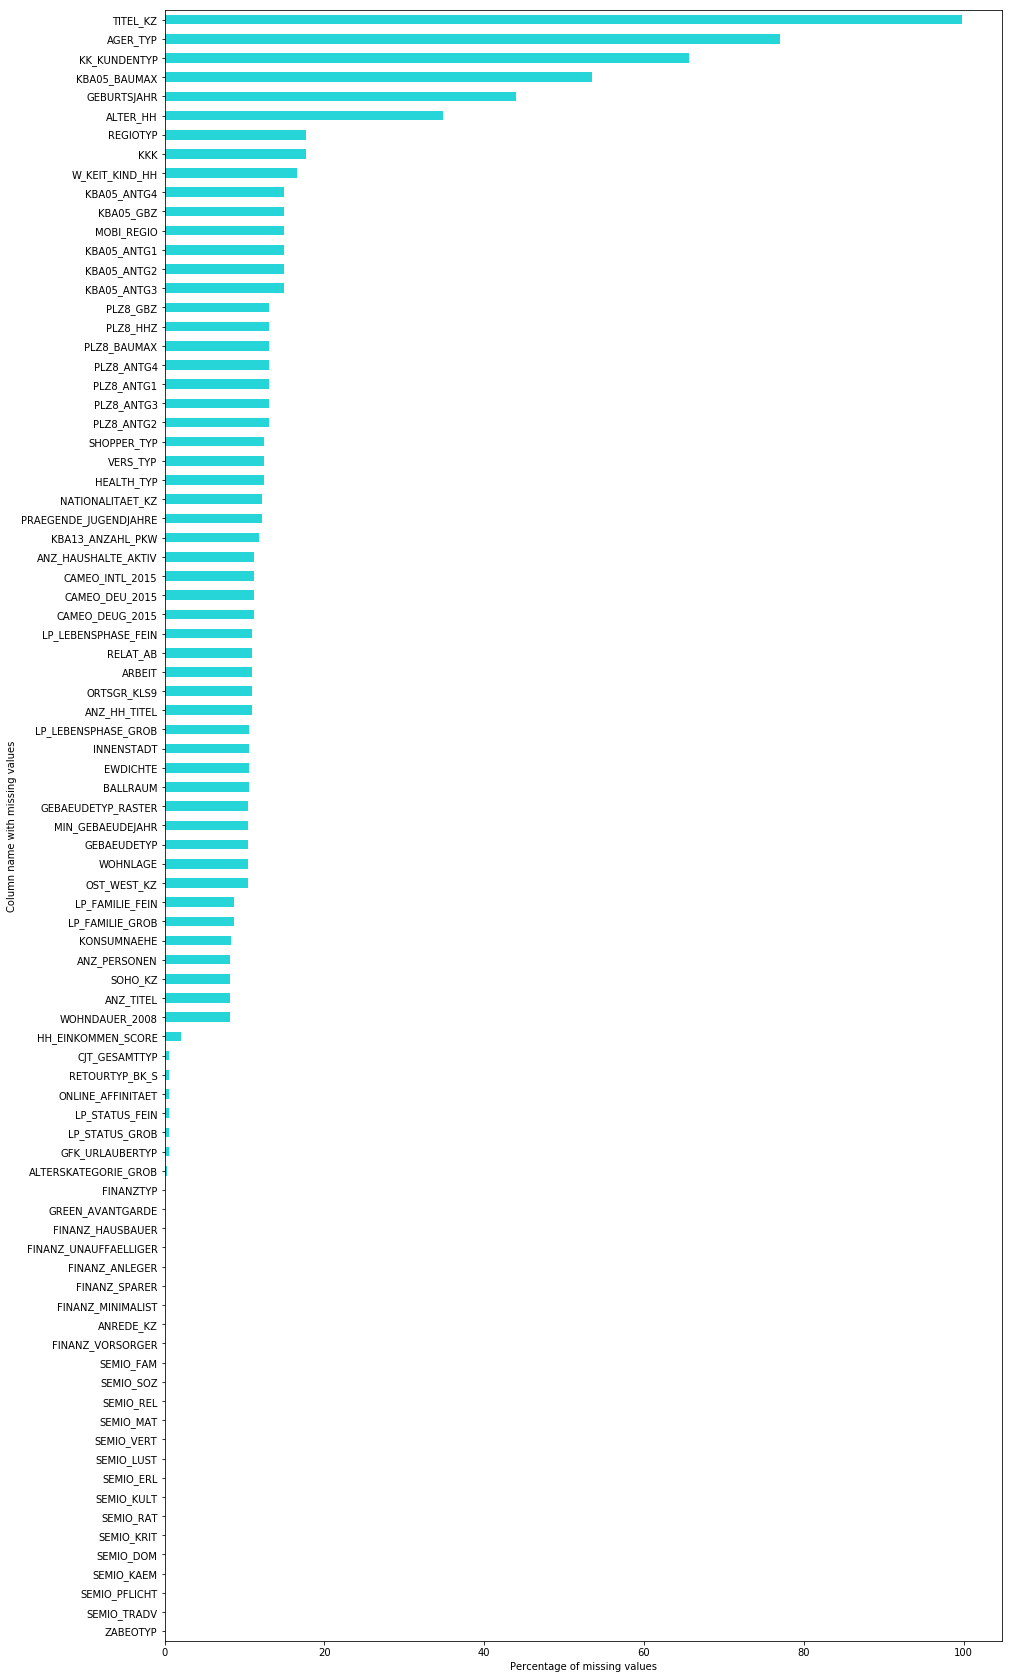

In [28]:
# Investigate patterns in the amount of missing data in each column.
# plot histogram

# Investigate patterns in the amount of missing data in each column.
barh=np.round(percentage_number_of_nan_after_per_collumn, decimals=2).plot.barh(figsize=(15,30),color = 'darkturquoise', alpha = 0.85)
plt.xlabel('Percentage of missing values')
plt.ylabel('Column name with missing values')
plt.show()



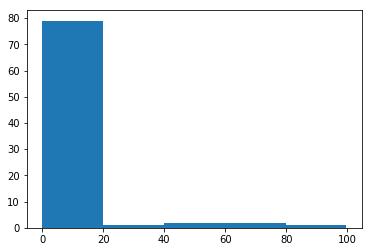

In [29]:
plt.figure(figsize=(6,4))
n, bins, patches = plt.hist(percentage_number_of_nan_after_per_collumn, bins=5)
plt.show()

In [30]:
# Remove the outlier columns from the dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)
# drop columns have more than 20 percent missing data

drop_collumns = percentage_number_of_nan_after_per_collumn[percentage_number_of_nan_after_per_collumn>20]
print(drop_collumns)

drop_coloumns_list = drop_collumns.index.tolist()
print('These columns have more than 20 percent missing data, and will be dropped: {} '.format(drop_coloumns_list))



ALTER_HH        34.813699
GEBURTSJAHR     44.020282
KBA05_BAUMAX    53.468668
KK_KUNDENTYP    65.596749
AGER_TYP        76.955435
TITEL_KZ        99.757636
dtype: float64
These columns have more than 20 percent missing data, and will be dropped: ['ALTER_HH', 'GEBURTSJAHR', 'KBA05_BAUMAX', 'KK_KUNDENTYP', 'AGER_TYP', 'TITEL_KZ'] 


In [31]:
azdias = azdias.drop(drop_coloumns_list, axis=1)
print('azdias_shape: ', azdias.shape)



azdias_shape:  (891221, 79)


In [32]:
nan_azdias=nan_azdias.drop(drop_coloumns_list, axis=1)
print('nan_azdias_shape: ', nan_azdias.shape)

nan_azdias_shape:  (891221, 79)


#### Discussion 1.1.2: Assess Missing Data in Each Column

(Double click this cell and replace this text with your own text, reporting your observations regarding the amount of missing data in each column. Are there any patterns in missing values? Which columns were removed from the dataset?)

the collumns with 'Semio' and 'Finanz' at the bgining have no nan values it seems they are mandatory collumns that 
participants need to provide response. collumns which start with 'PLZ8' and 'KBA05' have repectivly around 13 and 15% nan values.

Most columns have less than 20% missing data.thes collumns have more than 20% nan values are considered as outlier.

These columns have more than 20 percent missing data, and will be dropped:
['ALTER_HH', 'GEBURTSJAHR', 'KBA05_BAUMAX', 'KK_KUNDENTYP', 'AGER_TYP', 'TITEL_KZ'] 

#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

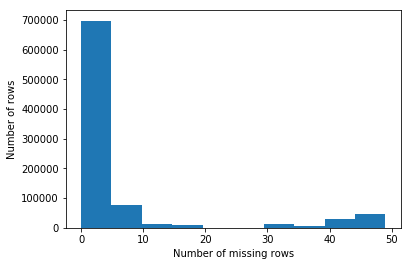

In [33]:
# How much data is missing in each row of the dataset?
missing_nan_rows=nan_azdias.isna().sum(axis=1)
plt.hist(missing_nan_rows)
plt.xlabel('Number of missing rows')
plt.ylabel('Number of rows')
plt.show()
# mostly all rows have at least 5 missing values and around 100000 rows have at least 10 missing values
# if I want to define a threshold I will consider 25 becuase under 25 and above 25 missing values are obvious in hist plot.

In [34]:
missing_nan_rows

0         43
1          0
2          0
3          7
4          0
5          0
6          0
7          0
8          0
9          0
10         0
11        47
12         6
13         8
14        47
15         8
16         6
17        47
18         3
19         0
20        10
21         0
22         0
23         8
24        47
25         5
26        19
27         0
28         0
29         2
          ..
891191     0
891192     0
891193     0
891194     0
891195     0
891196     0
891197     0
891198     0
891199     0
891200     0
891201     0
891202     0
891203    14
891204     0
891205     0
891206     0
891207     0
891208     3
891209     0
891210     0
891211     0
891212     0
891213     0
891214     0
891215     0
891216     3
891217     4
891218     5
891219     0
891220     0
Length: 891221, dtype: int64

In [35]:
# Write code to divide the data into two subsets based on the number of missing
# values in each row.
# threshold =25
na_azdias_row_below25 = nan_azdias[(nan_azdias.isna().sum(axis=1))<=25]
na_azdias_row_over25 = nan_azdias[(nan_azdias.isna().sum(axis=1))>25]


In [36]:
na_azdias_row_below25.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
1,1.0,2,5.0,1,5,2,5,4,5,1,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,3.0,2,3.0,1,4,1,2,3,5,1,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,4.0,2,2.0,4,2,5,2,1,2,6,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,3.0,1,5.0,4,3,4,1,3,2,5,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0
5,1.0,2,2.0,3,1,5,2,2,5,2,...,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0


In [37]:
print('rows with less than 25 missing values')
print(type(na_azdias_row_below25))
print(na_azdias_row_below25.shape)
print('----------------------')
print('\n')
print('rows with more than 25 missing values')
print(type(na_azdias_row_over25))
print(na_azdias_row_over25.shape)



rows with less than 25 missing values
<class 'pandas.core.frame.DataFrame'>
(797961, 79)
----------------------


rows with more than 25 missing values
<class 'pandas.core.frame.DataFrame'>
(93260, 79)


In [38]:
A=na_azdias_row_below25['FINANZ_SPARER'].value_counts()
A

1    244223
2    148880
5    143887
3    138057
4    122914
Name: FINANZ_SPARER, dtype: int64

In [39]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.

def compare_columns_func(df1,df2,column, title_1='Below 25 NA Values',title_2="Above 25 NA Values"):
    '''
    Takes two DataFrames and a column name as input and plots two countplots of the given column for both DataFrames.
    '''
    # Taking max value count between the 2 columns to set as ylim for both plots
    df1_max = df1[column].value_counts().iloc[0]
    df2_max = df2[column].value_counts().iloc[0]
    if df1_max > df2_max:
        top = df1_max * 1.05
    else:
        top = df2_max * 1.05
    
    # Plotting
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,3))
    sns.countplot(df1[column],ax=ax1)
    ax1.set_ylabel('Count')
    ax1.set_ylim(top=top)
    ax1.set_title(title_1)
    sns.countplot(df2[column],ax=ax2)
    ax2.set_ylabel('Count')
    ax2.set_ylim(top=top)
    ax2.set_title(title_2)
    plt.tight_layout()

In [40]:
collumn_list=na_azdias_row_below25.columns

In [41]:
print(collumn_list)

Index(['ALTERSKATEGORIE_GROB', 'ANREDE_KZ', 'CJT_GESAMTTYP',
       'FINANZ_MINIMALIST', 'FINANZ_SPARER', 'FINANZ_VORSORGER',
       'FINANZ_ANLEGER', 'FINANZ_UNAUFFAELLIGER', 'FINANZ_HAUSBAUER',
       'FINANZTYP', 'GFK_URLAUBERTYP', 'GREEN_AVANTGARDE', 'HEALTH_TYP',
       'LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'LP_FAMILIE_FEIN',
       'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB',
       'NATIONALITAET_KZ', 'PRAEGENDE_JUGENDJAHRE', 'RETOURTYP_BK_S',
       'SEMIO_SOZ', 'SEMIO_FAM', 'SEMIO_REL', 'SEMIO_MAT', 'SEMIO_VERT',
       'SEMIO_LUST', 'SEMIO_ERL', 'SEMIO_KULT', 'SEMIO_RAT', 'SEMIO_KRIT',
       'SEMIO_DOM', 'SEMIO_KAEM', 'SEMIO_PFLICHT', 'SEMIO_TRADV',
       'SHOPPER_TYP', 'SOHO_KZ', 'VERS_TYP', 'ZABEOTYP', 'ANZ_PERSONEN',
       'ANZ_TITEL', 'HH_EINKOMMEN_SCORE', 'W_KEIT_KIND_HH', 'WOHNDAUER_2008',
       'ANZ_HAUSHALTE_AKTIV', 'ANZ_HH_TITEL', 'GEBAEUDETYP', 'KONSUMNAEHE',
       'MIN_GEBAEUDEJAHR', 'OST_WEST_KZ', 'WOHNLAGE', 'CAMEO_DEUG_2015',
       'CAMEO

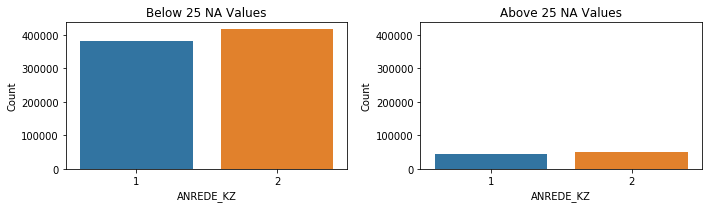

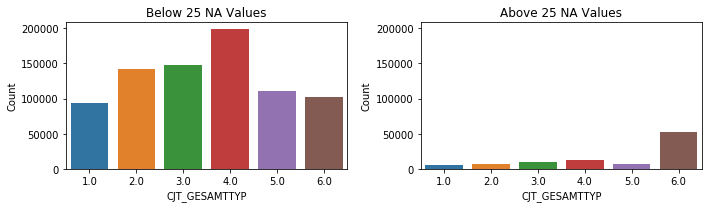

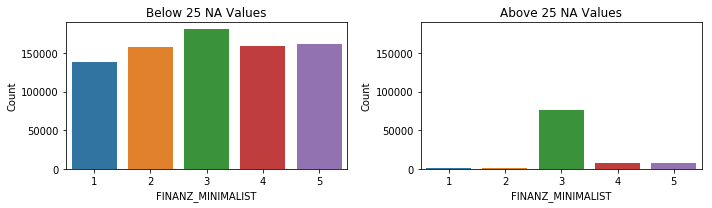

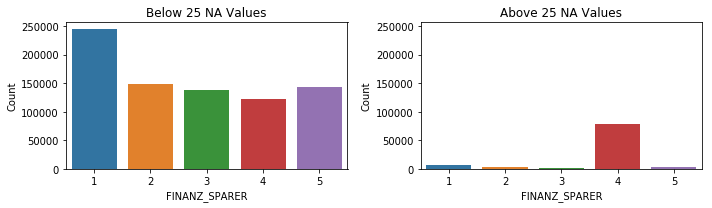

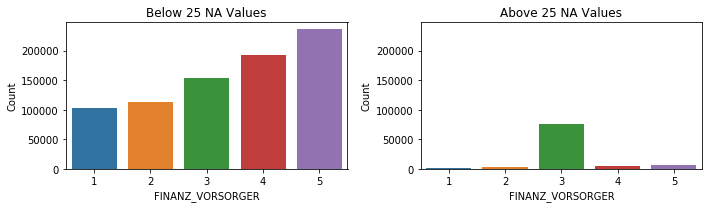

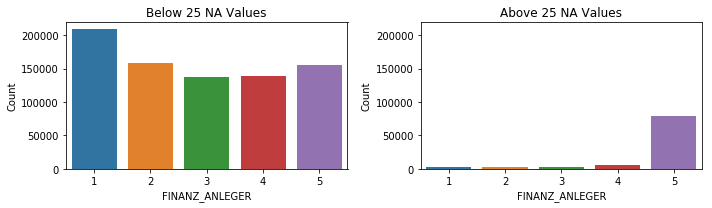

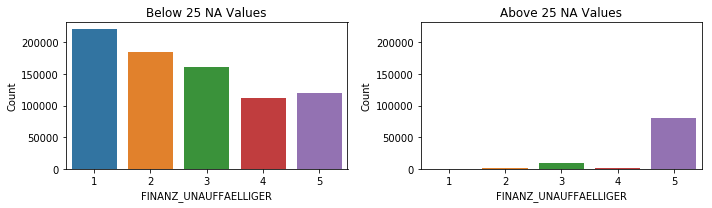

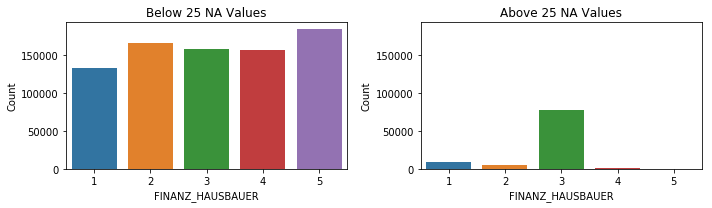

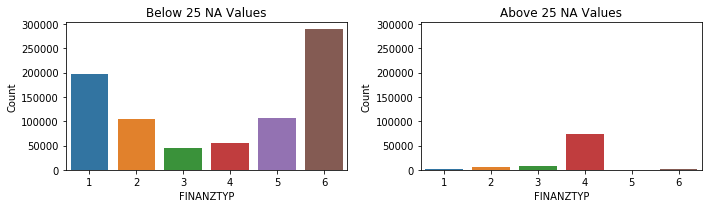

In [42]:
for n in collumn_list[1:10]:
    compare_columns_func(na_azdias_row_below25,na_azdias_row_over25,n,"Below 25 NA Values","Above 25 NA Values")

#### Discussion 1.1.3: Assess Missing Data in Each Row

(Double-click this cell and replace this text with your own text, reporting your observations regarding missing data in rows. Are the data with lots of missing values are qualitatively different from data with few or no missing values?)

we divide missing data in rows based on a threshold lower than 25 missing data in each row or higher than 25 missing values in each row. 

Subset1: na_azdias_row_below25---> rows with less 25 missing vulese.
Subset2: na_azdias_row_over25 ---> rows with more than 25 missing values.

then I compared these two subset in 5 features. the distribution of missing values in these two subset are completely different
 
In subset1 with less than 25 missing values, the missing values almost distributed equally among different values of each feature while for subset2 almost the missing values are belong to one of the value in each feature

With this, we can conclude that the data with lots of missing values are qualitatively different from the data with few or no missing values.




In [43]:
print('rows with less than 25 missing values')
print(type(na_azdias_row_below25))
print(na_azdias_row_below25.shape)
print('----------------------')
print('\n')
print('rows with more than 25 missing values')
print(type(na_azdias_row_over25))
print(na_azdias_row_over25.shape)


rows with less than 25 missing values
<class 'pandas.core.frame.DataFrame'>
(797961, 79)
----------------------


rows with more than 25 missing values
<class 'pandas.core.frame.DataFrame'>
(93260, 79)


In [44]:
# drop rows with more than 25 missing values:

nan_azdias_row = nan_azdias[(nan_azdias.isna().sum(axis=1))<=25][:]

In [45]:
nan_azdias_row.shape

(797961, 79)

In [46]:
nan_azdias_row.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
1,1.0,2,5.0,1,5,2,5,4,5,1,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,3.0,2,3.0,1,4,1,2,3,5,1,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,4.0,2,2.0,4,2,5,2,1,2,6,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,3.0,1,5.0,4,3,4,1,3,2,5,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0
5,1.0,2,2.0,3,1,5,2,2,5,2,...,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0


### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [47]:
# How many features are there of each data type?
# we need to see what type of data do we have now? so we need first omit the collumn we omit already from
# nan_azdias_row data fram from feat_info and then we can count the type of each datatype
# we want to fix the data type of 'categorical' and 'mixed'
col_list=nan_azdias_row.columns.tolist()
feat_info_1=feat_info[feat_info['attribute'].isin(col_list)]
feat_info_1['type'].value_counts()

ordinal        49
categorical    18
numeric         6
mixed           6
Name: type, dtype: int64

#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

In [48]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?
categorical=feat_info_1[feat_info_1['type']=='categorical']

In [49]:
nan_azdias_row['ANREDE_KZ'].nunique()

2

In [50]:
binary_list=[]# list of binary category
multi_level_list=[]
for i in categorical['attribute']:
    #print(i)
    a=nan_azdias_row[i].nunique()
    if a==2:
        binary_list.append(i)
    else:
       multi_level_list.append(i) 

In [51]:
print('binary category features: \n',binary_list)
print('------------------------')
print('\n')
print('Multi-level category features:\n ',multi_level_list)


binary category features: 
 ['ANREDE_KZ', 'GREEN_AVANTGARDE', 'SOHO_KZ', 'VERS_TYP', 'OST_WEST_KZ']
------------------------


Multi-level category features:
  ['CJT_GESAMTTYP', 'FINANZTYP', 'GFK_URLAUBERTYP', 'LP_FAMILIE_FEIN', 'LP_FAMILIE_GROB', 'LP_STATUS_FEIN', 'LP_STATUS_GROB', 'NATIONALITAET_KZ', 'SHOPPER_TYP', 'ZABEOTYP', 'GEBAEUDETYP', 'CAMEO_DEUG_2015', 'CAMEO_DEU_2015']


In [52]:
nan_azdias_row[binary_list].head()

,ANREDE_KZ,GREEN_AVANTGARDE,SOHO_KZ,VERS_TYP,OST_WEST_KZ
1,2,0,1.0,2.0,W
2,2,1,0.0,1.0,W
3,2,0,0.0,1.0,W
4,1,0,0.0,2.0,W
5,2,0,0.0,2.0,W


In [53]:
# as you can see the collumn 'OST_WEST_KZ' is binary but does not have numerical values so we take this one from binary 
# for one-hot encoding too
nan_azdias_row['OST_WEST_KZ'].value_counts()

W    629433
O    168528
Name: OST_WEST_KZ, dtype: int64

In [54]:
multi_level_list.append('OST_WEST_KZ')
nan_azdias_row[multi_level_list].head()

,CJT_GESAMTTYP,FINANZTYP,GFK_URLAUBERTYP,LP_FAMILIE_FEIN,LP_FAMILIE_GROB,LP_STATUS_FEIN,LP_STATUS_GROB,NATIONALITAET_KZ,SHOPPER_TYP,ZABEOTYP,GEBAEUDETYP,CAMEO_DEUG_2015,CAMEO_DEU_2015,OST_WEST_KZ
1,5.0,1,10.0,5.0,3.0,2.0,1.0,1.0,3.0,5,8.0,8,8A,W
2,3.0,1,10.0,1.0,1.0,3.0,2.0,1.0,2.0,5,1.0,4,4C,W
3,2.0,6,1.0,NaN,NaN,9.0,4.0,1.0,1.0,3,1.0,2,2A,W
4,5.0,5,5.0,10.0,5.0,3.0,2.0,1.0,2.0,4,1.0,6,6B,W
5,2.0,2,1.0,1.0,1.0,4.0,2.0,1.0,0.0,4,1.0,8,8C,W


In [55]:


ordinal=feat_info_1[feat_info_1['type']=='ordinal']['attribute']
nan_azdias_row[ordinal].head()


,ALTERSKATEGORIE_GROB,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,HEALTH_TYP,RETOURTYP_BK_S,SEMIO_SOZ,...,REGIOTYP,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
1,1.0,1,5,2,5,4,5,3.0,1.0,5,...,3.0,2.0,3.0,2.0,1.0,5.0,4.0,3.0,5.0,4.0
2,3.0,1,4,1,2,3,5,3.0,3.0,4,...,2.0,3.0,3.0,1.0,0.0,4.0,4.0,3.0,5.0,2.0
3,4.0,4,2,5,2,1,2,2.0,2.0,5,...,NaN,2.0,2.0,2.0,0.0,3.0,4.0,2.0,3.0,3.0
4,3.0,4,3,4,1,3,2,3.0,5.0,6,...,5.0,2.0,4.0,2.0,1.0,3.0,3.0,4.0,6.0,5.0
5,1.0,3,1,5,2,2,5,3.0,3.0,2,...,5.0,2.0,3.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0


In [56]:
numeric=feat_info_1[feat_info_1['type']=='numeric']['attribute']
nan_azdias_row[numeric].head()

,ANZ_PERSONEN,ANZ_TITEL,ANZ_HAUSHALTE_AKTIV,ANZ_HH_TITEL,MIN_GEBAEUDEJAHR,KBA13_ANZAHL_PKW
1,2.0,0.0,11.0,0.0,1992.0,963.0
2,1.0,0.0,10.0,0.0,1992.0,712.0
3,0.0,0.0,1.0,0.0,1997.0,596.0
4,4.0,0.0,3.0,0.0,1992.0,435.0
5,1.0,0.0,5.0,0.0,1992.0,1300.0


In [57]:
mixed=feat_info_1[feat_info_1['type']=='mixed']['attribute']
nan_azdias_row[mixed].head()


,LP_LEBENSPHASE_FEIN,LP_LEBENSPHASE_GROB,PRAEGENDE_JUGENDJAHRE,WOHNLAGE,CAMEO_INTL_2015,PLZ8_BAUMAX
1,21.0,6.0,14.0,4.0,51,1.0
2,3.0,1.0,15.0,2.0,24,1.0
3,NaN,NaN,8.0,7.0,12,1.0
4,32.0,10.0,8.0,3.0,43,2.0
5,8.0,2.0,3.0,7.0,54,1.0


In [58]:
# drop two collumns of  ['CAMEO_INTL_2015','PRAEGENDE_JUGENDJAHRE'] since they are not categorical
list_collumn=nan_azdias_row[mixed].drop(columns=['CAMEO_INTL_2015','PRAEGENDE_JUGENDJAHRE'])
for i in list_collumn.columns.tolist():
    multi_level_list.append(i)

In [59]:
# Re-encode categorical variable(s) to be kept in the analysis.
nan_azdias_row = pd.get_dummies(nan_azdias_row,columns=multi_level_list)


In [60]:
nan_azdias_row.shape

(797961, 256)

In [61]:
nan_azdias_row.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,WOHNLAGE_3.0,WOHNLAGE_4.0,WOHNLAGE_5.0,WOHNLAGE_7.0,WOHNLAGE_8.0,PLZ8_BAUMAX_1.0,PLZ8_BAUMAX_2.0,PLZ8_BAUMAX_3.0,PLZ8_BAUMAX_4.0,PLZ8_BAUMAX_5.0
1,1.0,2,1,5,2,5,4,5,0,3.0,...,0,1,0,0,0,1,0,0,0,0
2,3.0,2,1,4,1,2,3,5,1,3.0,...,0,0,0,0,0,1,0,0,0,0
3,4.0,2,4,2,5,2,1,2,0,2.0,...,0,0,0,1,0,1,0,0,0,0
4,3.0,1,4,3,4,1,3,2,0,3.0,...,1,0,0,0,0,0,1,0,0,0
5,1.0,2,3,1,5,2,2,5,0,3.0,...,0,0,0,1,0,1,0,0,0,0


#### Discussion 1.2.1: Re-Encode Categorical Features

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding categorical features. Which ones did you keep, which did you drop, and what engineering steps did you perform?)

we have differetn type of data and I keep the ordinal, numeric and caterorical with two value(binary categorical) unchanged and do one-hot encoding on categorical (with more than two values) and mixed features

I kept ordinal and numeric columns the same, and one-hot encoded multi-level categorical, one binary categorical, and some mixed variable columns.

#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

Below is the mapping for "PRAEGENDE_JUGENDJAHRE" from the Data_Dictionary.md

1: 40s - war years (Mainstream, E+W)
2: 40s - reconstruction years (Avantgarde, E+W)
3: 50s - economic miracle (Mainstream, E+W)
4: 50s - milk bar / Individualisation (Avantgarde, E+W)
5: 60s - economic miracle (Mainstream, E+W)
6: 60s - generation 68 / student protestors (Avantgarde, W)
7: 60s - opponents to the building of the Wall (Avantgarde, E)
8: 70s - family orientation (Mainstream, E+W)
9: 70s - peace movement (Avantgarde, E+W)
10: 80s - Generation Golf (Mainstream, W)
11: 80s - ecological awareness (Avantgarde, W)
12: 80s - FDJ / communist party youth organisation (Mainstream, E)
13: 80s - Swords into ploughshares (Avantgarde, E)
14: 90s - digital media kids (Mainstream, E+W)
15: 90s - ecological awareness (Avantgarde, E+W)

In [62]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.
movement = []
decade = []
for val in nan_azdias['PRAEGENDE_JUGENDJAHRE']:
    # Mapping for movement
    if val in [1,3,5,8,10,12,14]:
        movement.append(0) 
    elif val in [2,4,6,7,9,11,13,15]:
        movement.append(1)
    else:
        movement.append(np.NaN)
    # Mapping for decade  
    if val in [1,2]:
        decade.append(40)
    elif val in [3,4]:
        decade.append(50)
    elif val in [5,6,7]:
        decade.append(60)
    elif val in [8,9]:
        decade.append(70)
    elif val in [10,11,12]:
        decade.append(80)
    elif val in [13,14,15]:
        decade.append(90)
    else:
        decade.append(np.NaN)


In [63]:
movement = pd.Series(movement)
decade = pd.Series(decade)

In [64]:
nan_azdias_row['movement']=movement
nan_azdias_row['decade']=decade


Below is a mapping for "CAMEO_INTL_2015" from the Data_Dictionary.md

11: Wealthy Households - Pre-Family Couples & Singles
12: Wealthy Households - Young Couples With Children
13: Wealthy Households - Families With School Age Children
14: Wealthy Households - Older Families & Mature Couples
15: Wealthy Households - Elders In Retirement
21: Prosperous Households - Pre-Family Couples & Singles
22: Prosperous Households - Young Couples With Children
23: Prosperous Households - Families With School Age Children
24: Prosperous Households - Older Families & Mature Couples
25: Prosperous Households - Elders In Retirement
31: Comfortable Households - Pre-Family Couples & Singles
32: Comfortable Households - Young Couples With Children
33: Comfortable Households - Families With School Age Children
34: Comfortable Households - Older Families & Mature Couples
35: Comfortable Households - Elders In Retirement
41: Less Affluent Households - Pre-Family Couples & Singles
42: Less Affluent Households - Young Couples With Children
43: Less Affluent Households - Families With School Age Children
44: Less Affluent Households - Older Families & Mature Couples
45: Less Affluent Households - Elders In Retirement
51: Poorer Households - Pre-Family Couples & Singles
52: Poorer Households - Young Couples With Children
53: Poorer Households - Families With School Age Children
54: Poorer Households - Older Families & Mature Couples
55: Poorer Households - Elders In Retirement

In [65]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.
wealth_dict = {'11':1, '12':1, '13':1, '14':1, '15':1, 
               '21':2, '22':2, '23':2, '24':2, '25':2,
               '31':3, '32':3, '33':3, '34':3, '35':3, 
               '41':4, '42':4, '43':4, '44':4, '45':4,
               '51':5, '52':5, '53':5, '54':5, '55':5}

life_stage_dict = {'11':1, '12':2, '13':3, '14':4, '15':5, 
                   '21':1, '22':2, '23':3, '24':4, '25':5,
                   '31':1, '32':2, '33':3, '34':4, '35':5, 
                   '41':1, '42':2, '43':3, '44':4, '45':5,
                   '51':1, '52':2, '53':3, '54':4, '55':5}

nan_azdias_row['CAMEO_INTL_2015_wealth']=nan_azdias_row['CAMEO_INTL_2015'].map(wealth_dict)
nan_azdias_row['CAMEO_INTL_2015_life_stage']=nan_azdias_row['CAMEO_INTL_2015'].map(life_stage_dict)

In [66]:
print(len(nan_azdias_row.columns))

260


In [67]:
nan_azdias_row=nan_azdias_row.drop(['CAMEO_INTL_2015','PRAEGENDE_JUGENDJAHRE'],axis=1)
  

In [68]:
print(len(nan_azdias_row.columns))

258


In [69]:
nan_azdias_row['CAMEO_INTL_2015_life_stage']

1         1.0
2         4.0
3         2.0
4         3.0
5         4.0
6         2.0
7         4.0
8         3.0
9         5.0
10        1.0
12        3.0
13        3.0
15        1.0
16        1.0
18        4.0
19        4.0
20        4.0
21        5.0
22        1.0
23        3.0
25        3.0
26        NaN
27        1.0
28        3.0
29        2.0
31        1.0
32        4.0
33        1.0
34        5.0
36        1.0
         ... 
891191    4.0
891192    2.0
891193    3.0
891194    4.0
891195    5.0
891196    3.0
891197    4.0
891198    4.0
891199    1.0
891200    2.0
891201    1.0
891202    1.0
891203    5.0
891204    4.0
891205    4.0
891206    5.0
891207    1.0
891208    4.0
891209    1.0
891210    1.0
891211    1.0
891212    1.0
891213    4.0
891214    3.0
891215    1.0
891216    1.0
891217    1.0
891218    4.0
891219    1.0
891220    3.0
Name: CAMEO_INTL_2015_life_stage, Length: 797961, dtype: float64

#### Discussion 1.2.2: Engineer Mixed-Type Features

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding mixed-value features. Which ones did you keep, which did you drop, and what engineering steps did you perform?)

I performed the following steps above...

After removing outlier columns and rows , I kept ordinal, binary categorical and numeric columns the same, and one-hot encoded multi-level categorical, one binary categorical( as you can see the collumn 'OST_WEST_KZ' is binary but does not have numerical values so I take this one from binary category for one-hot encoding too), and some mixed variable columns.

I replaced "PRAEGENDE_JUGENDJAHRE" with two new columns: movement and decade according to the mapping from the Data_Dictionary.md.

I replaced CAMEO_INTL_2015 I replaced "CAMEO_INTL_2015" with a two columns called 'CAMEO_INTL_2015_wealth' and 'CAMEO_INTL_2015_life_stage' .

#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

In [70]:
# If there are other re-engineering tasks you need to perform, make sure you
# take care of them here. (Dealing with missing data will come in step 2.1.)



In [71]:
# Do whatever you need to in order to ensure that the dataframe only contains
# the columns that should be passed to the algorithm functions.



### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [103]:

    


def clean_data(feat_info_att_index,feat_info,df1):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
     
    


    INPUT: 
    
           df1:  # Load in the general demographics data.
                    azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv', sep=';')
                    
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    nan_df1=df1[:]
    # Looping through our column names
    for column in nan_df1.columns:
        nan_df1[column].replace(feat_info_att_index.loc[column].loc['NAN'],np.NaN,inplace=True)
    
    percentage_number_of_nan_after_per_collumn=(nan_df1.isnull().sum().sort_values(ascending=True)/len(nan_df1))*100
    drop_collumns = percentage_number_of_nan_after_per_collumn[percentage_number_of_nan_after_per_collumn>20]
    drop_coloumns_list = drop_collumns.index.tolist()
    df1 = df1.drop(drop_coloumns_list, axis=1)
    nan_df1=nan_df1.drop(drop_coloumns_list, axis=1)
    missing_nan_rows=nan_df1.isna().sum(axis=1)
    nan_df1_row = nan_df1[(nan_df1.isna().sum(axis=1))<=25][:]
    
    col_list=nan_df1_row.columns.tolist()
    feat_info_1=feat_info[feat_info['attribute'].isin(col_list)]
    feat_info_1['type'].value_counts()
    categorical=feat_info_1[feat_info_1['type']=='categorical']
    
    binary_list=[]# list of binary category
    multi_level_list=[]
    for i in categorical['attribute']:
        #print(i)
        a=nan_df1_row[i].nunique()
        if a==2:
            binary_list.append(i)
        else:
           multi_level_list.append(i)
    
    
    multi_level_list.append('OST_WEST_KZ')
    mixed=feat_info_1[feat_info_1['type']=='mixed']['attribute']
   
    
    list_collumn=nan_df1_row[mixed].drop(columns=['CAMEO_INTL_2015','PRAEGENDE_JUGENDJAHRE'])
    for i in list_collumn.columns.tolist():
        multi_level_list.append(i)
        
    nan_df1_row = pd.get_dummies(nan_df1_row,columns=multi_level_list)
    
    movement = []
    decade = []
    for val in nan_df1['PRAEGENDE_JUGENDJAHRE']:
        # Mapping for movement
        if val in [1,3,5,8,10,12,14]:
            movement.append(0) 
        elif val in [2,4,6,7,9,11,13,15]:
            movement.append(1)
        else:
            movement.append(np.NaN)
        # Mapping for decade  
        if val in [1,2]:
            decade.append(40)
        elif val in [3,4]:
            decade.append(50)
        elif val in [5,6,7]:
            decade.append(60)
        elif val in [8,9]:
            decade.append(70)
        elif val in [10,11,12]:
            decade.append(80)
        elif val in [13,14,15]:
            decade.append(90)
        else:
            decade.append(np.NaN)
            
    movement = pd.Series(movement)
    decade = pd.Series(decade)
    nan_df1_row['movement']=movement
    nan_df1_row['decade']=decade
    
    wealth_dict = {'11':1, '12':1, '13':1, '14':1, '15':1, 
               '21':2, '22':2, '23':2, '24':2, '25':2,
               '31':3, '32':3, '33':3, '34':3, '35':3, 
               '41':4, '42':4, '43':4, '44':4, '45':4,
               '51':5, '52':5, '53':5, '54':5, '55':5}

    life_stage_dict = {'11':1, '12':2, '13':3, '14':4, '15':5, 
                   '21':1, '22':2, '23':3, '24':4, '25':5,
                   '31':1, '32':2, '33':3, '34':4, '35':5, 
                   '41':1, '42':2, '43':3, '44':4, '45':5,
                   '51':1, '52':2, '53':3, '54':4, '55':5}

    nan_df1_row['CAMEO_INTL_2015_wealth']=nan_df1_row['CAMEO_INTL_2015'].map(wealth_dict)
    nan_df1_row['CAMEO_INTL_2015_life_stage']=nan_df1_row['CAMEO_INTL_2015'].map(life_stage_dict)
    nan_df1_row=nan_df1_row.drop(['CAMEO_INTL_2015','PRAEGENDE_JUGENDJAHRE'],axis=1)

    return nan_df1_row

## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](https://scikit-learn.org/0.16/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [73]:
print(nan_azdias_row.isnull().sum().sum())

761265


In [74]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.
from sklearn.preprocessing import Imputer

fill_missing = Imputer(strategy='most_frequent')
azdias_clean_imputed = pd.DataFrame(fill_missing.fit_transform(nan_azdias_row))


In [75]:
nan_azdias_row.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,WOHNLAGE_8.0,PLZ8_BAUMAX_1.0,PLZ8_BAUMAX_2.0,PLZ8_BAUMAX_3.0,PLZ8_BAUMAX_4.0,PLZ8_BAUMAX_5.0,movement,decade,CAMEO_INTL_2015_wealth,CAMEO_INTL_2015_life_stage
1,1.0,2,1,5,2,5,4,5,0,3.0,...,0,1,0,0,0,0,0.0,90.0,5.0,1.0
2,3.0,2,1,4,1,2,3,5,1,3.0,...,0,1,0,0,0,0,1.0,90.0,2.0,4.0
3,4.0,2,4,2,5,2,1,2,0,2.0,...,0,1,0,0,0,0,0.0,70.0,1.0,2.0
4,3.0,1,4,3,4,1,3,2,0,3.0,...,0,0,1,0,0,0,0.0,70.0,4.0,3.0
5,1.0,2,3,1,5,2,2,5,0,3.0,...,0,1,0,0,0,0,0.0,50.0,5.0,4.0


In [76]:
azdias_clean_imputed.head()

,0,1,2,3,4,5,6,7,8,9,...,248,249,250,251,252,253,254,255,256,257
0,1.0,2.0,1.0,5.0,2.0,5.0,4.0,5.0,0.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,90.0,5.0,1.0
1,3.0,2.0,1.0,4.0,1.0,2.0,3.0,5.0,1.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,90.0,2.0,4.0
2,4.0,2.0,4.0,2.0,5.0,2.0,1.0,2.0,0.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,70.0,1.0,2.0
3,3.0,1.0,4.0,3.0,4.0,1.0,3.0,2.0,0.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,70.0,4.0,3.0
4,1.0,2.0,3.0,1.0,5.0,2.0,2.0,5.0,0.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,50.0,5.0,4.0


In [77]:
print(azdias_clean_imputed.isnull().sum().sum())

0


In [78]:
azdias_clean_imputed.columns = nan_azdias_row.columns
azdias_clean_imputed.index = nan_azdias_row.index

In [79]:
azdias_clean_imputed.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,WOHNLAGE_8.0,PLZ8_BAUMAX_1.0,PLZ8_BAUMAX_2.0,PLZ8_BAUMAX_3.0,PLZ8_BAUMAX_4.0,PLZ8_BAUMAX_5.0,movement,decade,CAMEO_INTL_2015_wealth,CAMEO_INTL_2015_life_stage
1,1.0,2.0,1.0,5.0,2.0,5.0,4.0,5.0,0.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,90.0,5.0,1.0
2,3.0,2.0,1.0,4.0,1.0,2.0,3.0,5.0,1.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,90.0,2.0,4.0
3,4.0,2.0,4.0,2.0,5.0,2.0,1.0,2.0,0.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,70.0,1.0,2.0
4,3.0,1.0,4.0,3.0,4.0,1.0,3.0,2.0,0.0,3.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,70.0,4.0,3.0
5,1.0,2.0,3.0,1.0,5.0,2.0,2.0,5.0,0.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,50.0,5.0,4.0


In [80]:
# Apply feature scaling to the general population demographics data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
azdias_clean_scaled = scaler.fit_transform(azdias_clean_imputed)

In [81]:
azdias_clean_scaled = pd.DataFrame(azdias_clean_scaled, columns=list(azdias_clean_imputed))
azdias_clean_scaled.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,WOHNLAGE_8.0,PLZ8_BAUMAX_1.0,PLZ8_BAUMAX_2.0,PLZ8_BAUMAX_3.0,PLZ8_BAUMAX_4.0,PLZ8_BAUMAX_5.0,movement,decade,CAMEO_INTL_2015_wealth,CAMEO_INTL_2015_life_stage
0,-1.766616,0.957933,-1.494605,1.537983,-1.040689,1.466048,0.958818,1.339234,-0.530442,1.010191,...,-0.149584,0.772890,-0.311082,-0.260564,-0.276529,-0.372723,-0.530442,1.089165,1.175774,-1.249039
1,0.200529,0.957933,-1.494605,0.864617,-1.766963,-0.570958,0.244259,1.339234,1.885219,1.010191,...,-0.149584,0.772890,-0.311082,-0.260564,-0.276529,-0.372723,1.885219,1.089165,-0.869601,0.766998
2,1.184102,0.957933,0.683156,-0.482116,1.138133,-0.570958,-1.184858,-0.791347,-0.530442,-0.311795,...,-0.149584,0.772890,-0.311082,-0.260564,-0.276529,-0.372723,-0.530442,-0.271627,-1.551393,-0.577027
3,0.200529,-1.043914,0.683156,0.191250,0.411859,-1.249960,0.244259,-0.791347,-0.530442,1.010191,...,-0.149584,-1.293844,3.214583,-0.260564,-0.276529,-0.372723,-0.530442,-0.271627,0.493982,0.094986
4,-1.766616,0.957933,-0.042764,-1.155482,1.138133,-0.570958,-0.470299,1.339234,-0.530442,1.010191,...,-0.149584,0.772890,-0.311082,-0.260564,-0.276529,-0.372723,-0.530442,-1.632418,1.175774,0.766998


### Discussion 2.1: Apply Feature Scaling

(Double-click this cell and replace this text with your own text, reporting your decisions regarding feature scaling.)

For simplicity's sake, I chose to impute the data with the most frequent value in each column. Then, I've standardized our data using a StandardScaler

### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [82]:
# Apply PCA to the data.
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(azdias_clean_scaled)



PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [83]:
pca?

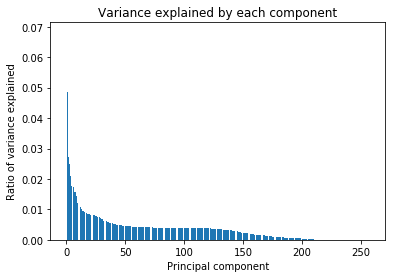

In [84]:
# Investigate the variance accounted for by each principal component.

plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.title("Variance explained by each component")
plt.xlabel("Principal component")
plt.ylabel("Ratio of variance explained")
plt.show()

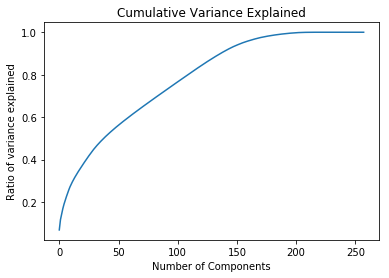

In [85]:
plt.plot(range(len(pca.explained_variance_ratio_)),np.cumsum(pca.explained_variance_ratio_), '-')
plt.title("Cumulative Variance Explained")
plt.xlabel("Number of Components")
plt.ylabel("Ratio of variance explained")
plt.show()

In [86]:
# Re-apply PCA to the data while selecting for number of components to retain.

pca_150 = PCA(n_components=150)
azdias_pca = pca_150.fit_transform(azdias_clean_scaled)

print(pca_150.explained_variance_ratio_.sum())
print(pca_150.n_components)

?????

print(azdias_pca.explained_variance_ratio_.sum())
print(azdias_pca.n_components)

### Discussion 2.2: Perform Dimensionality Reduction

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding dimensionality reduction. How many principal components / transformed features are you retaining for the next step of the analysis?)
I decided to retain 150 principal components, as it expalains more than 90% variances while reducing the number of features about 50%

### Step 2.3: Interpret Principal Components

Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.
- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the *i*-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [87]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.
def weights(pca, i):
    df = pd.DataFrame(pca.components_, columns=list(azdias_clean_scaled.columns))
    weights = df.iloc[i].sort_values(ascending=False)
    return weights

pca_weight_0 = weights(pca_150, 0)
print (pca_weight_0)


LP_STATUS_GROB_1.0            0.185193
HH_EINKOMMEN_SCORE            0.172492
PLZ8_ANTG3                    0.172144
CAMEO_INTL_2015_wealth        0.170484
PLZ8_ANTG4                    0.165928
ORTSGR_KLS9                   0.147757
EWDICHTE                      0.145395
FINANZ_HAUSBAUER              0.141948
LP_STATUS_FEIN_1.0            0.123793
KBA05_ANTG4                   0.120353
PLZ8_ANTG2                    0.118882
KBA05_ANTG3                   0.110510
ARBEIT                        0.107959
ANZ_HAUSHALTE_AKTIV           0.107882
PLZ8_BAUMAX_5.0               0.105874
CAMEO_DEUG_2015_9             0.105298
LP_STATUS_FEIN_2.0            0.105201
LP_LEBENSPHASE_GROB_1.0       0.102014
FINANZTYP_1                   0.101481
RELAT_AB                      0.101177
FINANZ_SPARER                 0.100782
CAMEO_DEUG_2015_8             0.086641
LP_LEBENSPHASE_FEIN_1.0       0.085081
LP_FAMILIE_FEIN_1.0           0.084651
LP_FAMILIE_GROB_1.0           0.084651
PLZ8_BAUMAX_4.0          

In [88]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.

pca_weight_1 = weights(pca_150, 1)
print (pca_weight_1)


ALTERSKATEGORIE_GROB        0.219870
FINANZ_VORSORGER            0.212504
ZABEOTYP_3                  0.188097
SEMIO_ERL                   0.162585
SEMIO_LUST                  0.152532
RETOURTYP_BK_S              0.149561
LP_LEBENSPHASE_GROB_2.0     0.145921
W_KEIT_KIND_HH              0.117538
LP_LEBENSPHASE_FEIN_6.0     0.105498
CJT_GESAMTTYP_2.0           0.102087
FINANZTYP_5                 0.095776
FINANZ_MINIMALIST           0.094159
LP_STATUS_FEIN_1.0          0.089125
FINANZTYP_2                 0.087712
FINANZ_HAUSBAUER            0.074451
LP_LEBENSPHASE_FEIN_8.0     0.071628
CJT_GESAMTTYP_1.0           0.067715
FINANZTYP_6                 0.067318
SHOPPER_TYP_3.0             0.065809
NATIONALITAET_KZ_1.0        0.063984
SEMIO_KRIT                  0.060048
LP_LEBENSPHASE_FEIN_5.0     0.058448
LP_FAMILIE_GROB_1.0         0.058237
LP_FAMILIE_FEIN_1.0         0.058237
GFK_URLAUBERTYP_4.0         0.054879
PLZ8_ANTG3                  0.054053
EWDICHTE                    0.053827
O

In [89]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.
pca_weight_2 = weights(pca_150, 2)
print (pca_weight_2)


SEMIO_VERT                  0.293213
SEMIO_FAM                   0.244232
SEMIO_SOZ                   0.241976
SEMIO_KULT                  0.237885
FINANZTYP_5                 0.132613
ZABEOTYP_1                  0.126717
FINANZ_MINIMALIST           0.122570
movement                    0.122430
GREEN_AVANTGARDE            0.122430
SEMIO_REL                   0.115167
SHOPPER_TYP_0.0             0.111971
LP_STATUS_FEIN_10.0         0.098845
LP_STATUS_GROB_5.0          0.098845
ORTSGR_KLS9                 0.094528
EWDICHTE                    0.093397
SEMIO_MAT                   0.089738
PLZ8_ANTG3                  0.061857
RETOURTYP_BK_S              0.061688
PLZ8_ANTG4                  0.061233
PLZ8_BAUMAX_5.0             0.053373
LP_STATUS_GROB_3.0          0.050514
RELAT_AB                    0.047346
PLZ8_ANTG2                  0.047009
SHOPPER_TYP_1.0             0.046976
LP_LEBENSPHASE_FEIN_20.0    0.043677
ARBEIT                      0.042883
LP_LEBENSPHASE_FEIN_40.0    0.041497
L

### Discussion 2.3: Interpret Principal Components

(Double-click this cell and replace this text with your own text, reporting your observations from detailed investigation of the first few principal components generated. Can we interpret positive and negative values from them in a meaningful way?)

Fisrt Component:  

these 6 features have the most positive correlation toghther for the first component:
LP_STATUS_GROB_1.0            0.185193
HH_EINKOMMEN_SCORE            0.172492
PLZ8_ANTG3                    0.172144
CAMEO_INTL_2015_wealth        0.170484
PLZ8_ANTG4                    0.165928
ORTSGR_KLS9                   0.147757

these 6 features have the most Negative correlation toghther for the first component:
PLZ8_BAUMAX_1.0              -0.162145
KBA05_ANTG1                  -0.167825
KBA05_GBZ                    -0.168898
PLZ8_ANTG1                   -0.172983
MOBI_REGIO                   -0.174502
FINANZ_MINIMALIST            -0.176705

Second Component: 

these 6 features have the most positive correlation toghther for the second component
ALTERSKATEGORIE_GROB        0.219870
FINANZ_VORSORGER            0.212504
ZABEOTYP_3                  0.188097
SEMIO_ERL                   0.162585
SEMIO_LUST                  0.152532
RETOURTYP_BK_S              0.149561

these 6 features have the most Negative correlation toghther for the second component
SEMIO_TRADV                -0.195153
FINANZ_ANLEGER             -0.197680
SEMIO_REL                  -0.198128
FINANZ_UNAUFFAELLIGER      -0.208164
FINANZ_SPARER              -0.221177
decade                     -0.223255

third component: 

these 6 features have the most positive correlation toghther for the third component
SEMIO_VERT                  0.293213
SEMIO_FAM                   0.244232
SEMIO_SOZ                   0.241975
SEMIO_KULT                  0.237885
FINANZTYP_5                 0.132613
ZABEOTYP_1                  0.126717

these 6 features have the most Negative correlation toghther for the third component
FINANZ_ANLEGER             -0.145497
SEMIO_ERL                  -0.202605
SEMIO_DOM                  -0.247881
SEMIO_KRIT                 -0.250533
SEMIO_KAEM                 -0.281385
ANREDE_KZ                  -0.315243

## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

In [90]:
# Over a number of different cluster counts...

from sklearn.cluster import KMeans
scores = []
clusters_center = list(np.arange(2,21,2))
for i in clusters_center:

    model = KMeans(n_clusters =i)
    model.fit(azdias_pca)
    # Score is sum of squared distances to a sample's assigned centroid
    scores.append(abs(model.score(azdias_pca)))
    print(f'Running Score for {i} Clusters: {abs(model.score(azdias_pca)):.3f}')



    

Running Score for 2 Clusters: 181975689.522
Running Score for 4 Clusters: 172683313.270
Running Score for 6 Clusters: 166802962.256
Running Score for 8 Clusters: 163088043.062
Running Score for 10 Clusters: 159035893.646
Running Score for 12 Clusters: 155526650.968
Running Score for 14 Clusters: 152927953.312
Running Score for 16 Clusters: 148305576.895
Running Score for 18 Clusters: 145002856.830
Running Score for 20 Clusters: 143605345.908


Text(0,0.5,'SSE')

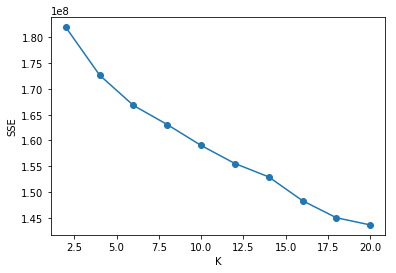

In [91]:
# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.

plt.plot(clusters_center, scores, linestyle='-', marker='o')
plt.xlabel('K')
plt.ylabel('SSE')



In [92]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.
kmeans = KMeans(n_clusters = 14)
model_14 = kmeans.fit(azdias_pca)
azdias_pred = model_14.predict(azdias_pca)


### Discussion 3.1: Apply Clustering to General Population

(Double-click this cell and replace this text with your own text, reporting your findings and decisions regarding clustering. Into how many clusters have you decided to segment the population?)

From the above plot, the elbow place is nt really obvious but I decide 
to choose K=14 as the elbow. Therefore, I decided to use 14 clusters for this problem.

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [104]:
# Load in the customer demographics data.
customers = pd.read_csv('Udacity_CUSTOMERS_Subset.csv', sep=';')

In [105]:
customers.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,2,4,1,5.0,5,1,5,1,2,2,...,3.0,3.0,1.0,0.0,1.0,5.0,5.0,1.0,2.0,1.0
1,-1,4,1,NaN,5,1,5,1,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1,4,2,2.0,5,1,5,1,4,4,...,2.0,3.0,3.0,1.0,3.0,3.0,2.0,3.0,5.0,3.0
3,1,4,1,2.0,5,1,5,2,1,2,...,3.0,2.0,1.0,0.0,1.0,3.0,4.0,1.0,3.0,1.0
4,-1,3,1,6.0,3,1,4,4,5,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,3.0,5.0,1.0


In [110]:


def clean_data(feat_info_att_index,feat_info,df1):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
     
    


    INPUT: 
    
           df1:  # Load in the general demographics data.
                    azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv', sep=';')
                    
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    nan_df1=df1[:]
    # Looping through our column names
    for column in nan_df1.columns:
    #print(att_index.loc[column].loc['NAN'])
    #print('----------')
    # For every column in our DF, if a value is in the 'NAN' list, we replace it inplace with np.NaN
        nan_df1[column].replace(feat_info_att_index.loc[column].loc['NAN'],np.NaN,inplace=True)
    
    drop_collumns = percentage_number_of_nan_after_per_collumn[percentage_number_of_nan_after_per_collumn>20]
    drop_coloumns_list = drop_collumns.index.tolist()
    nan_df1=nan_df1.drop(drop_coloumns_list, axis=1)
    
    missing_nan_rows=nan_df1.isna().sum(axis=1)
    nan_df1_row = nan_df1[(nan_df1.isna().sum(axis=1))<=25][:]
    col_list=nan_df1_row.columns.tolist()
    feat_info_1=feat_info[feat_info['attribute'].isin(col_list)]
    feat_info_1['type'].value_counts()
    categorical=feat_info_1[feat_info_1['type']=='categorical']
    binary_list=[]# list of binary category
    multi_level_list=[]
    for i in categorical['attribute']:
    #print(i)
        a=nan_df1_row[i].nunique()
        if a==2:
            binary_list.append(i)
        else:
           multi_level_list.append(i) 
    multi_level_list.append('OST_WEST_KZ')
    mixed=feat_info_1[feat_info_1['type']=='mixed']['attribute']
    list_collumn=nan_df1_row[mixed].drop(columns=['CAMEO_INTL_2015','PRAEGENDE_JUGENDJAHRE'])
    for i in list_collumn.columns.tolist():
        multi_level_list.append(i)
    
    nan_df1_row = pd.get_dummies(nan_df1_row,columns=multi_level_list)
    
    movement = []
    decade = []
    for val in nan_df1['PRAEGENDE_JUGENDJAHRE']:
        # Mapping for movement
        if val in [1,3,5,8,10,12,14]:
            movement.append(0) 
        elif val in [2,4,6,7,9,11,13,15]:
            movement.append(1)
        else:
            movement.append(np.NaN)
        # Mapping for decade  
        if val in [1,2]:
            decade.append(40)
        elif val in [3,4]:
            decade.append(50)
        elif val in [5,6,7]:
            decade.append(60)
        elif val in [8,9]:
            decade.append(70)
        elif val in [10,11,12]:
            decade.append(80)
        elif val in [13,14,15]:
            decade.append(90)
        else:
            decade.append(np.NaN)
            
    movement = pd.Series(movement)
    decade = pd.Series(decade)
    nan_df1_row['movement']=movement
    nan_df1_row['decade']=decade
    
    wealth_dict = {'11':1, '12':1, '13':1, '14':1, '15':1, 
               '21':2, '22':2, '23':2, '24':2, '25':2,
               '31':3, '32':3, '33':3, '34':3, '35':3, 
               '41':4, '42':4, '43':4, '44':4, '45':4,
               '51':5, '52':5, '53':5, '54':5, '55':5}

    life_stage_dict = {'11':1, '12':2, '13':3, '14':4, '15':5, 
                   '21':1, '22':2, '23':3, '24':4, '25':5,
                   '31':1, '32':2, '33':3, '34':4, '35':5, 
                   '41':1, '42':2, '43':3, '44':4, '45':5,
                   '51':1, '52':2, '53':3, '54':4, '55':5}

    nan_df1_row['CAMEO_INTL_2015_wealth']=nan_df1_row['CAMEO_INTL_2015'].map(wealth_dict)
    nan_df1_row['CAMEO_INTL_2015_life_stage']=nan_df1_row['CAMEO_INTL_2015'].map(life_stage_dict)
    nan_df1_row=nan_df1_row.drop(['CAMEO_INTL_2015','PRAEGENDE_JUGENDJAHRE'],axis=1)

    return nan_df1_row

In [111]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.
    

customers_clean = clean_data(feat_info_att_index,feat_info,customers)


/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [113]:
customers_clean.shape

(141713, 257)

In [115]:
for i in nan_azdias_row.columns:
    if i not in customers_clean.columns:
        print(i)

GEBAEUDETYP_5.0


In [126]:
GEBAEUDETYP_5 = pd.Series(np.zeros(141725))
customers_clean['GEBAEUDETYP_5.0'] = GEBAEUDETYP_5

In [127]:
print(customers_clean.isnull().sum().sum())

141116


In [128]:
# Replace NaN
customers_clean_imputed = pd.DataFrame(fill_missing.transform(customers_clean))
customers_clean_imputed.columns = customers_clean.columns
customers_clean_imputed.index = customers_clean.index

In [129]:
print(customers_clean_imputed.isnull().sum().sum())

0


In [130]:
# scaling
customers_clean_scaled = scaler.transform(customers_clean_imputed)
customers_clean_scaled = pd.DataFrame(customers_clean_scaled, columns=list(customers_clean_imputed))


In [131]:
# PCA transformation
customers_pca = pca_150.transform(customers_clean_scaled)

# Predict using Kmeans model_14
customers_pred = model_14.predict(customers_pca)





### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?




df_preds_cust = pd.DataFrame(customers_pred,columns=['cust_preds'])
df_preds_gen =  pd.DataFrame(azdias_pred,columns=['gen_preds'])

prop_cust = df_preds_cust['cust_preds'].value_counts().sort_index()/sum(df_preds_cust['cust_preds'].value_counts())
prop_gen = df_preds_gen['gen_preds'].value_counts().sort_index()/sum(df_preds_gen['gen_preds'].value_counts())



Text(0.5,1,'Customer Clusters')

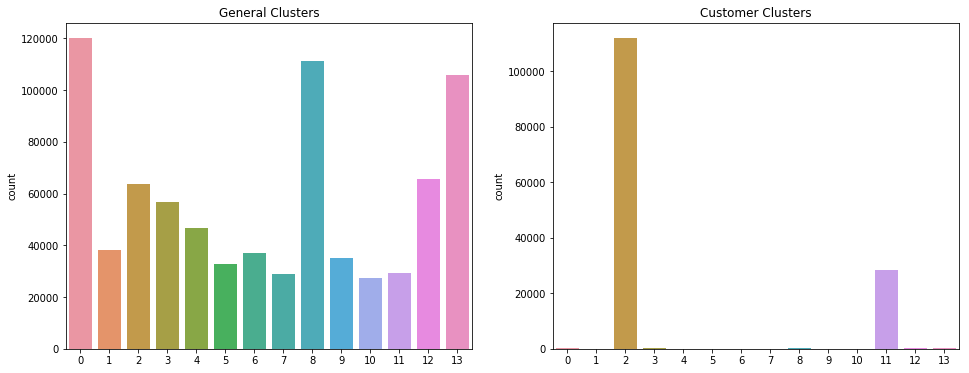

In [132]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.


figure, axs = plt.subplots(nrows=1, ncols=2, figsize = (16,6))
#figure.subplots_adjust(hspace = 1, wspace=.3)


sns.countplot(azdias_pred, ax=axs[0])
axs[0].set_title('General Clusters')


sns.countplot(customers_pred, ax=axs[1])
axs[1].set_title('Customer Clusters')




In [133]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?
centroid_2 = scaler.inverse_transform(pca_150.inverse_transform(model_14.cluster_centers_[2]))
overrepresented_costumer = pd.Series(data = centroid_2, index = customers_clean.columns)
print(overrepresented_costumer)



ALTERSKATEGORIE_GROB           3.155575
ANREDE_KZ                      1.469251
FINANZ_MINIMALIST              4.490449
FINANZ_SPARER                  1.922969
FINANZ_VORSORGER               3.860040
FINANZ_ANLEGER                 1.986029
FINANZ_UNAUFFAELLIGER          2.437411
FINANZ_HAUSBAUER               1.998393
GREEN_AVANTGARDE               0.981482
HEALTH_TYP                     2.113380
RETOURTYP_BK_S                 3.683100
SEMIO_SOZ                      4.226420
SEMIO_FAM                      3.759893
SEMIO_REL                      3.392977
SEMIO_MAT                      3.465524
SEMIO_VERT                     4.754362
SEMIO_LUST                     4.975101
SEMIO_ERL                      4.852264
SEMIO_KULT                     3.833880
SEMIO_RAT                      3.370155
SEMIO_KRIT                     4.458545
SEMIO_DOM                      4.533422
SEMIO_KAEM                     4.069327
SEMIO_PFLICHT                  3.556926
SEMIO_TRADV                    3.323050


In [134]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?
centroid_0 = scaler.inverse_transform(pca_150.inverse_transform(model_14.cluster_centers_[0]))
underrepresented_costumer = pd.Series(data = centroid_0, index = customers_clean.columns)
print(underrepresented_costumer)



ALTERSKATEGORIE_GROB           3.242011
ANREDE_KZ                      1.438921
FINANZ_MINIMALIST              4.529634
FINANZ_SPARER                  1.827968
FINANZ_VORSORGER               4.049718
FINANZ_ANLEGER                 2.473052
FINANZ_UNAUFFAELLIGER          2.031042
FINANZ_HAUSBAUER               1.959696
GREEN_AVANTGARDE               0.009784
HEALTH_TYP                     2.179154
RETOURTYP_BK_S                 3.618467
SEMIO_SOZ                      3.861248
SEMIO_FAM                      3.775123
SEMIO_REL                      3.365554
SEMIO_MAT                      3.335675
SEMIO_VERT                     4.693793
SEMIO_LUST                     4.631854
SEMIO_ERL                      5.017088
SEMIO_KULT                     3.897445
SEMIO_RAT                      3.323209
SEMIO_KRIT                     4.476239
SEMIO_DOM                      4.133800
SEMIO_KAEM                     3.916796
SEMIO_PFLICHT                  3.492320
SEMIO_TRADV                    3.115205


### Discussion 3.3: Compare Customer Data to Demographics Data

(Double-click this cell and replace this text with your own text, reporting findings and conclusions from the clustering analysis. Can we describe segments of the population that are relatively popular with the mail-order company, or relatively unpopular with the company?)

Cluster 2 is overrepresented in the customers data compared to general population data. population that are relative popular with the mail-order company:

ALTERSKATEGORIE_GROB           3.155575   Estimated ages is  (3: 46 - 60 years old 4: > 60 years old)
ANREDE_KZ                      1.469251   Estimated gender is (1: male, 2: female)
FINANZ_MINIMALIST              4.490449   Estimated (Financial typology, for each dimension:-1: unknown,1: very high,2:   high,3:average,4: low,5: very low





Cluster 0 is underrepresented in the customers data. Some characteristics of the segment of the population that are relatively unpopular with the company:

 
ALTERSKATEGORIE_GROB           3.242011
ANREDE_KZ                      1.438921
FINANZ_MINIMALIST              4.529634




> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.